## 1. Data Exploration and Visualization

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Plot Airport Customer Counts in EU

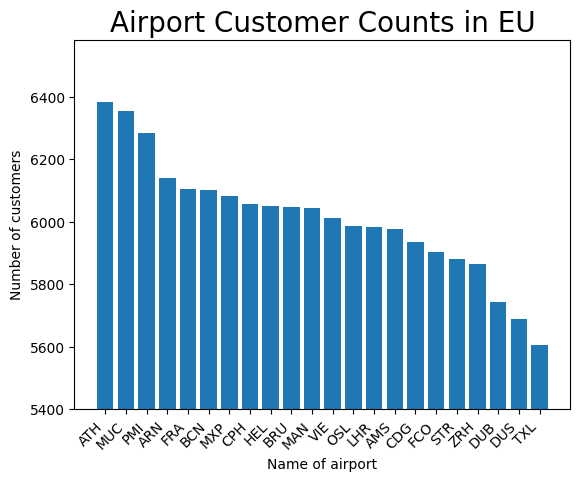

In [4]:
pd_passages_EU = pd.read_csv("passengersEU.csv")
airport_counts = pd_passages_EU['shopped_at'].value_counts().reset_index()
#print(airport_counts)
ywerte = airport_counts["shopped_at"]
xwerte = airport_counts['index']
plt.bar(xwerte, ywerte)
plt.ylim(5400, max(ywerte) + 200)  # Adjust the upper limit as needed
plt.xticks(rotation=45, ha='right')
# Labeling and title
plt.xlabel("Name of airport")
plt.ylabel("Number of customers")
plt.title('Airport Customer Counts in EU', size=20)
plt.show()

### 1.2 plot distribution of spending categories 

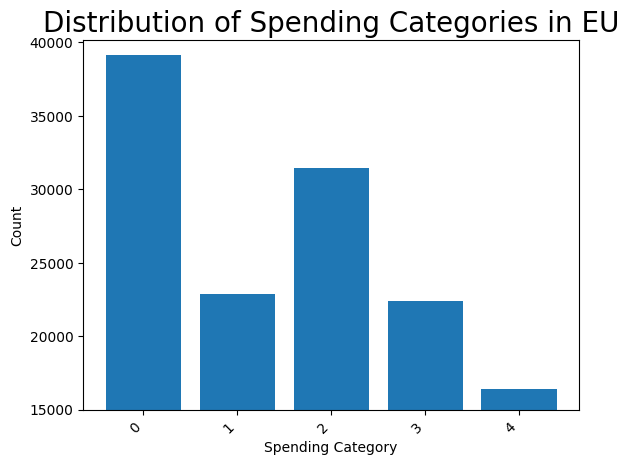

In [5]:
airport_Consumption = pd_passages_EU['amount_spent_cat'].value_counts().reset_index()
#print(airport_counts)
ywerte = airport_Consumption["amount_spent_cat"]
xwerte = airport_Consumption['index']
plt.bar(xwerte, ywerte)
plt.ylim(15000, max(ywerte) + 1000)  # Adjust the upper limit as needed
plt.xticks(rotation=45, ha='right')
# Labeling and title
plt.xlabel("Spending Category")
plt.ylabel("Count")
plt.title('Distribution of Spending Categories in EU', size=20)
plt.show()

Important class: 2> 3> 4 > 1  

### 1.3 Plot Airport Customer Counts in None EU

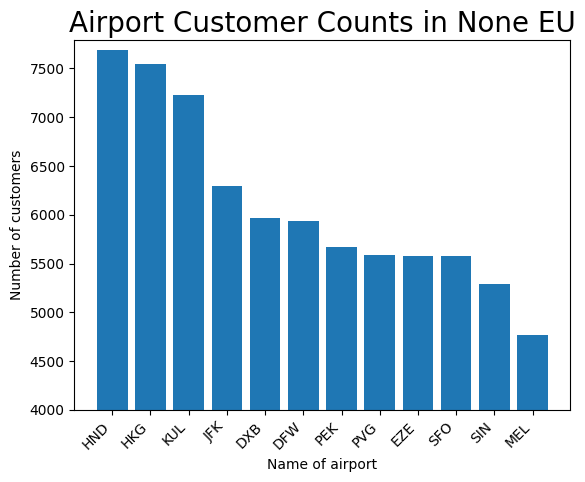

In [6]:
pd_passages_None_EU = pd.read_csv("passengersWW.csv")
#pd_passages_EU = pd_passages_EU.sort_values(by = "amount_spent_cat", ascending=False)
pd_passages_None_EU = pd_passages_None_EU.sort_values(by = "shopped_at")
airport_counts = pd_passages_None_EU['shopped_at'].value_counts().reset_index()
#print(airport_counts)
ywerte = airport_counts["shopped_at"]
xwerte = airport_counts['index']
plt.bar(xwerte, ywerte)
plt.ylim(4000, max(ywerte) + 100)  # Adjust the upper limit as needed
plt.xticks(rotation=45, ha='right')
# Labeling and title
plt.xlabel("Name of airport")
plt.ylabel("Number of customers")
plt.title('Airport Customer Counts in None EU', size=20)
plt.show()

### 1.4 Counts of cate values for each Airport

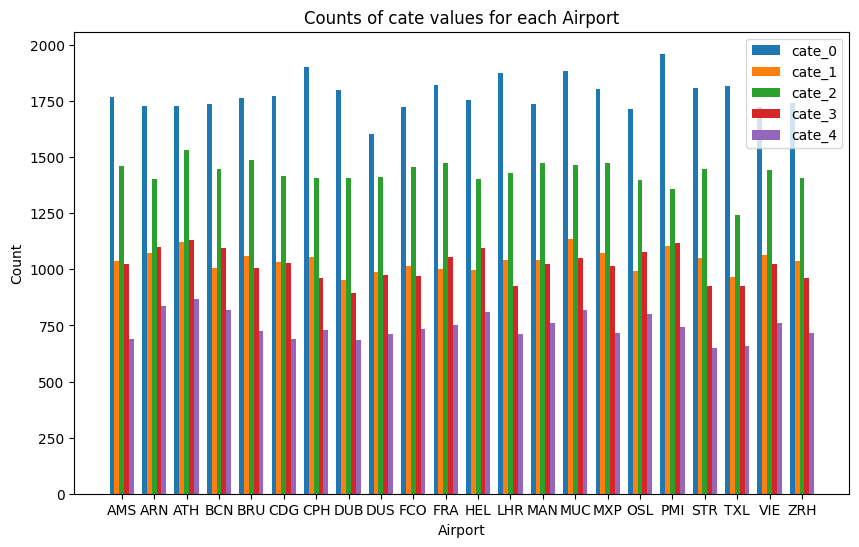

In [7]:
grouped_data =pd.read_excel('output.xlsx')
grouped_data.columns = ['airport', 'cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']

# Extract data
airports = grouped_data['airport']
cate_0 = grouped_data['cate_0']
cate_1 = grouped_data['cate_1']
cate_2 = grouped_data['cate_2']
cate_3 = grouped_data['cate_3']
cate_4 = grouped_data['cate_4']

# Create a side-by-side bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
bar_positions = range(len(airports))

ax.bar(bar_positions, cate_0, width=bar_width, label='cate_0')
ax.bar([p + bar_width for p in bar_positions], cate_1, width=bar_width, label='cate_1')
ax.bar([p + 2 * bar_width for p in bar_positions], cate_2, width=bar_width, label='cate_2')
ax.bar([p + 3 * bar_width for p in bar_positions], cate_3, width=bar_width, label='cate_3')
ax.bar([p + 4 * bar_width for p in bar_positions], cate_4, width=bar_width, label='cate_4')

# Add labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Counts of cate values for each Airport')
ax.set_xticks([p + 2 * bar_width for p in bar_positions])
ax.set_xticklabels(airports)
ax.legend()

# Display the chart
plt.show()


### 1.5 Total Count and Sum of Cate 2+3+4 for Top 7 Airports

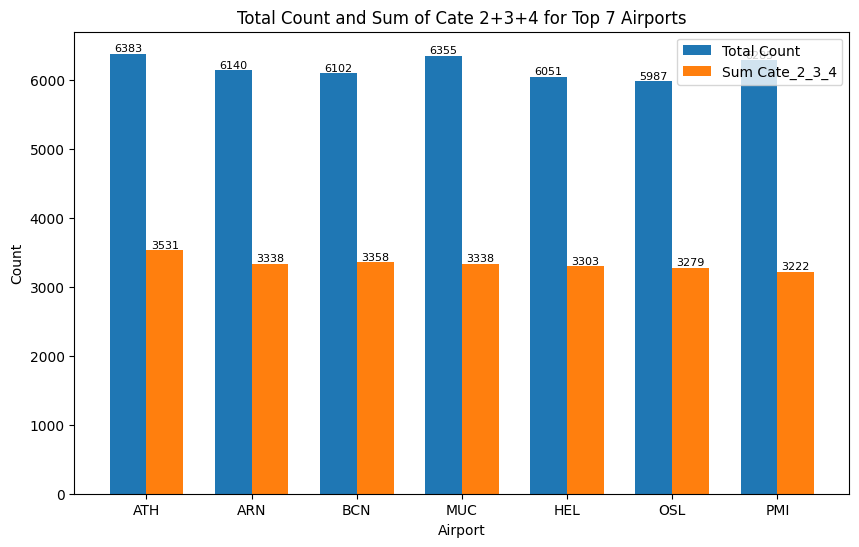

In [15]:
# Assuming   data is stored in df
# If not, replace df with   actual DataFrame
df = pd.read_excel("new_output_with_sum_consum_customers.xlsx")
# Find the top 7 airports based on Sum Consum
top7_airports = df.nlargest(7, 'Sum_Consum')

# Calculate the total count and the sum of cate_2, cate_3, and cate_4
top7_airports['Total Count'] = top7_airports[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']].sum(axis=1)
top7_airports['Sum Cate_2_3_4'] = top7_airports[['cate_2', 'cate_3', 'cate_4']].sum(axis=1)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(top7_airports))

# Total Count
total_count_bars = ax.bar(bar_positions, top7_airports['Total Count'], width=bar_width, label='Total Count')

# Sum of cate_2, cate_3, and cate_4
sum_cate_2_3_4_bars = ax.bar([p + bar_width for p in bar_positions], top7_airports['Sum Cate_2_3_4'], width=bar_width, label='Sum Cate_2_3_4')

# Set labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Total Count and Sum of Cate 2+3+4 for Top 7 Airports')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(top7_airports['airport'])
ax.legend()

# Add text labels on top of the bars
for bar in total_count_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black', fontsize=8)

for bar in sum_cate_2_3_4_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black', fontsize=8)

# Show the plot
plt.show()

### 1.6 last 7 airport (man kann mit Gewichte schicker machen)

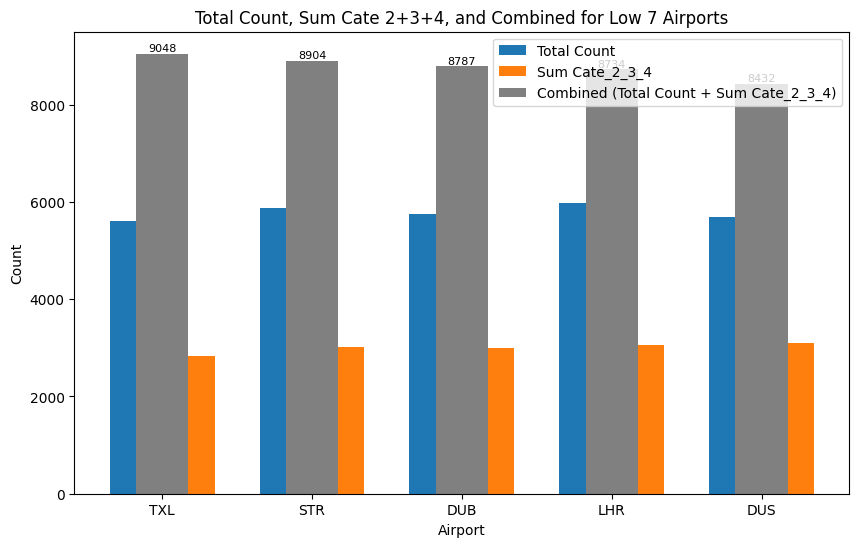

In [20]:

# Assuming  data is stored in df
# If not, replace df with  actual DataFrame
df = pd.read_excel("output_with_sum_consum_customers.xlsx")
# Find the top 7 airports based on Sum Consum
top7_airports = df.nsmallest(5, 'Sum_Consum')

# Calculate the total count and the sum of cate_2, cate_3, and cate_4
top7_airports['Total Count'] = top7_airports[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']].sum(axis=1)
top7_airports['Sum Cate_2_3_4'] = top7_airports[['cate_2', 'cate_3', 'cate_4']].sum(axis=1)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(top7_airports))

# Total Count
total_count_bars = ax.bar(bar_positions, top7_airports['Total Count'], width=bar_width, label='Total Count')

# Sum of cate_2, cate_3, and cate_4
sum_cate_2_3_4_bars = ax.bar([p + bar_width for p in bar_positions], top7_airports['Sum Cate_2_3_4'], width=bar_width, label='Sum Cate_2_3_4')

# Calculate and sort the sum of total_count_bars and sum_cate_2_3_4_bars
combined_bars = [bar1 + bar2 for bar1, bar2 in zip(top7_airports['Total Count'], top7_airports['Sum Cate_2_3_4'])]
sorted_combined_bars = sorted(enumerate(combined_bars), key=lambda x: x[1], reverse=True)

# Plot the combined result
combined_positions = [pos + bar_width / 2 for pos in bar_positions]
combined_bars_sorted = [combined_bars[i] for i, _ in sorted_combined_bars]
ax.bar(combined_positions, combined_bars_sorted, width=bar_width, label='Combined (Total Count + Sum Cate_2_3_4)', color='grey')

# Set labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Total Count, Sum Cate 2+3+4, and Combined for Low 7 Airports')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(top7_airports['airport'])
ax.legend()

# Add text labels on top of the combined bars
for pos, val in zip(combined_positions, combined_bars_sorted):
    plt.text(pos, val, round(val), ha='center', va='bottom', color='black', fontsize=8)

# Show the plot
plt.show()

### 1.7 Spending Categories by Business Trip in the EU

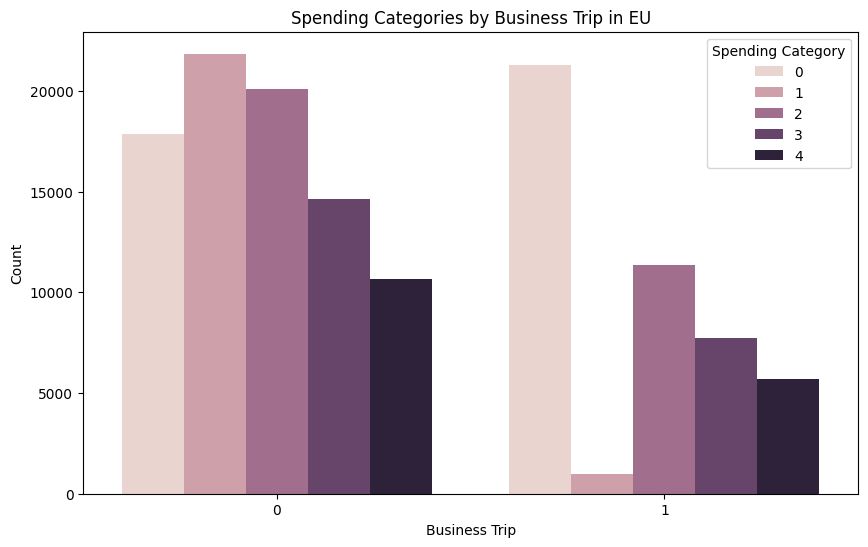

In [25]:
passengersEU = pd.read_csv("new_passengersEU.csv")
plt.figure(figsize=(10, 6))
sns.countplot(x='business_trip', hue='amount_spent_cat', data=passengersEU)
plt.title('Spending Categories by Business Trip in EU')
plt.xlabel('Business Trip')
plt.ylabel('Count')
plt.legend(title='Spending Category')
plt.show()

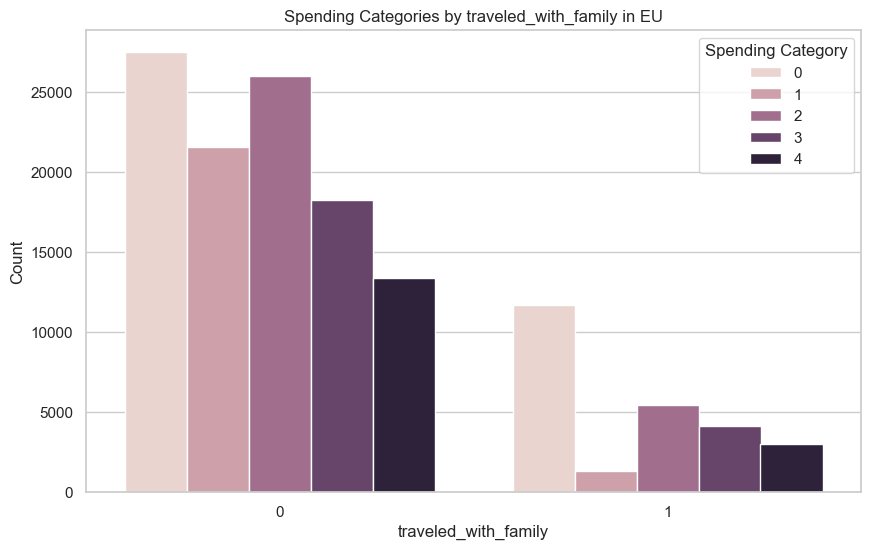

In [6]:
passengersEU = pd.read_csv("new_passengersEU.csv")
plt.figure(figsize=(10, 6))
sns.countplot(x='traveled_with_family', hue='amount_spent_cat', data=passengersEU)
plt.title('Spending Categories by traveled_with_family in EU')
plt.xlabel('traveled_with_family')
plt.ylabel('Count')
plt.legend(title='Spending Category')
plt.show()

### 1.8 Spending Categories by Layover Time in the EU

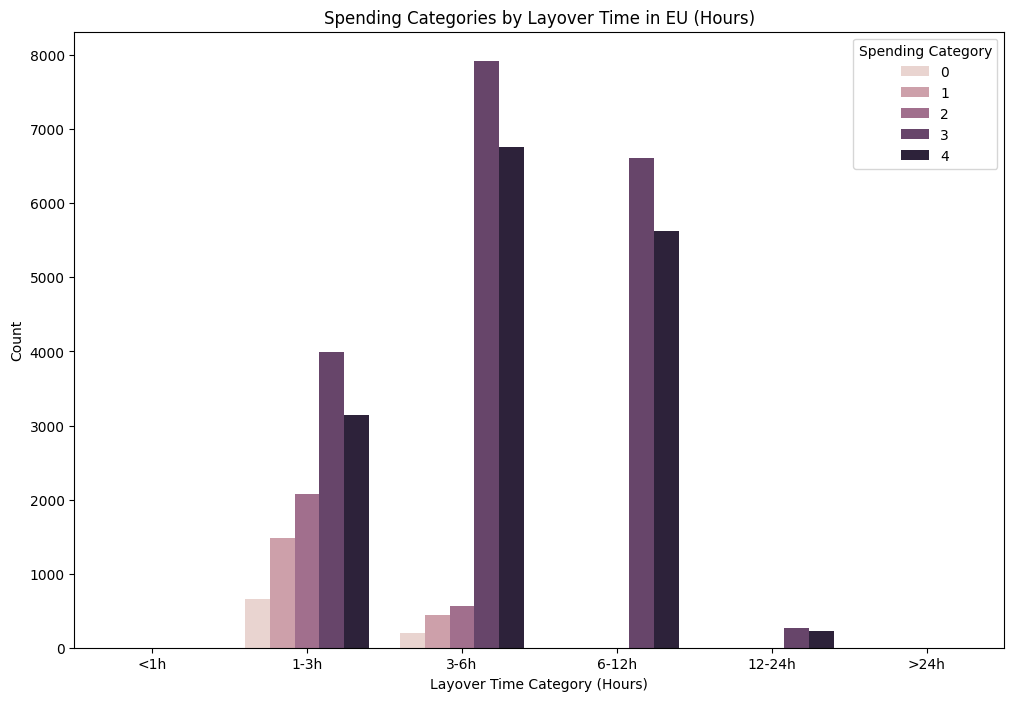

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Convert Layover Time from Minutes to Hours:
passengersEU = pd.read_csv("new_passengersEU.csv")
passengersEU['layover_time_hours'] = passengersEU['layover_time'] / 60

passengersEU['layover_time_cat_hours'] = pd.cut(passengersEU['layover_time_hours'],
                                                 bins=[0, 1, 3, 6, 12, 24, float('inf')],
                                                 labels=['<1h', '1-3h', '3-6h', '6-12h', '12-24h', '>24h'])
plt.figure(figsize=(12, 8))
sns.countplot(x='layover_time_cat_hours', hue='amount_spent_cat', data=passengersEU)
plt.title('Spending Categories by Layover Time in EU (Hours)')
plt.xlabel('Layover Time Category (Hours)')
plt.ylabel('Count')
plt.legend(title='Spending Category')
plt.show()

### 1.9 TOP 5 und last 5 Airports with business_trip, traveled_with_family, sex

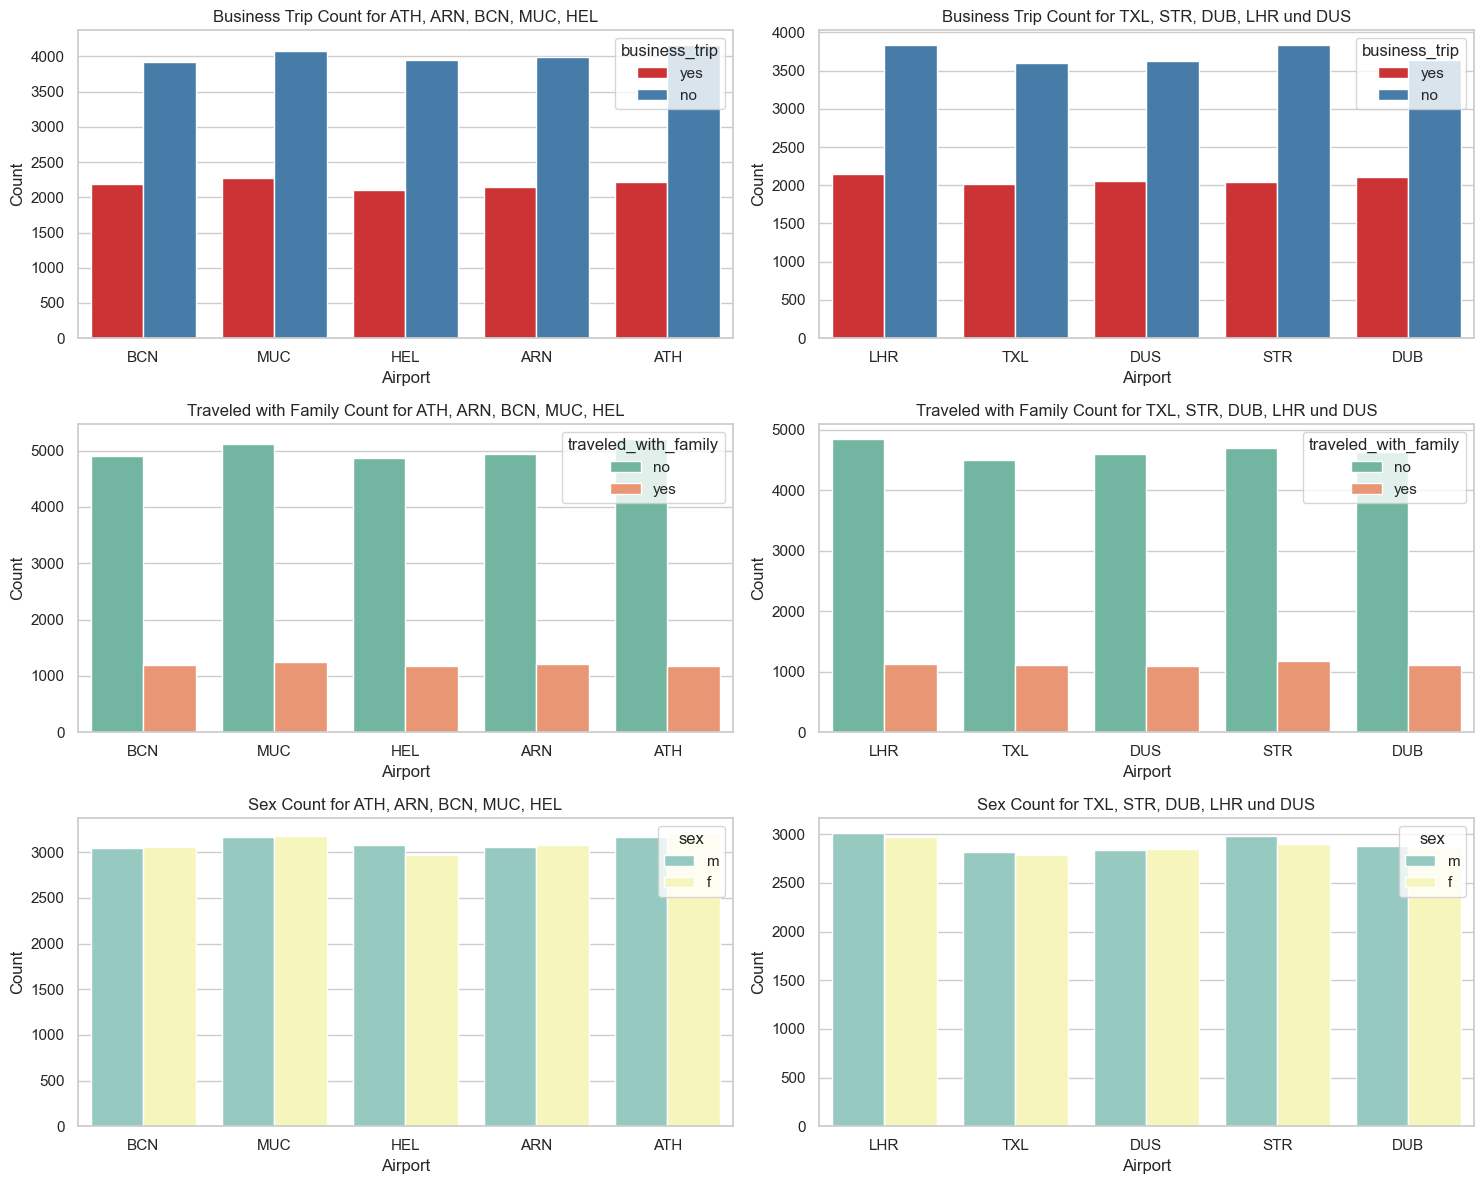

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("passengersEU.csv")

# Assuming   data is stored in df
# If not, replace df with   actual DataFrame

# Choose the airports for both scenarios
selected_airports_scenario1 = ['ATH', 'ARN', 'BCN', 'MUC', 'HEL']
selected_airports_scenario2 = ['TXL', 'STR', 'DUB', 'LHR', 'DUS']

# Filter data for both scenarios
filtered_passengers_scenario1 = df[df['shopped_at'].isin(selected_airports_scenario1)]
filtered_passengers_scenario2 = df[df['shopped_at'].isin(selected_airports_scenario2)]

# Set up the seaborn style
sns.set(style="whitegrid")

# Create subplots for Business Trip Count
plt.figure(figsize=(15, 12))

# Business Trip Count for Scenario 1
plt.subplot(3, 2, 1)
sns.countplot(x='shopped_at', hue='business_trip', data=filtered_passengers_scenario1, palette='Set1')
plt.title('Business Trip Count for ATH, ARN, BCN, MUC, HEL')
plt.xlabel('Airport')
plt.ylabel('Count')

# Business Trip Count for Scenario 2
plt.subplot(3, 2, 2)
sns.countplot(x='shopped_at', hue='business_trip', data=filtered_passengers_scenario2, palette='Set1')
plt.title('Business Trip Count for TXL, STR, DUB, LHR und DUS')
plt.xlabel('Airport')
plt.ylabel('Count')

# Traveled with Family Count for Scenario 1
plt.subplot(3, 2, 3)
sns.countplot(x='shopped_at', hue='traveled_with_family', data=filtered_passengers_scenario1, palette='Set2')
plt.title('Traveled with Family Count for ATH, ARN, BCN, MUC, HEL')
plt.xlabel('Airport')
plt.ylabel('Count')

# Traveled with Family Count for Scenario 2
plt.subplot(3, 2, 4)
sns.countplot(x='shopped_at', hue='traveled_with_family', data=filtered_passengers_scenario2, palette='Set2')
plt.title('Traveled with Family Count for TXL, STR, DUB, LHR und DUS')
plt.xlabel('Airport')
plt.ylabel('Count')

# Sex Count for Scenario 1
plt.subplot(3, 2, 5)
sns.countplot(x='shopped_at', hue='sex', data=filtered_passengers_scenario1, palette='Set3')
plt.title('Sex Count for ATH, ARN, BCN, MUC, HEL')
plt.xlabel('Airport')
plt.ylabel('Count')

# Sex Count for Scenario 2
plt.subplot(3, 2, 6)
sns.countplot(x='shopped_at', hue='sex', data=filtered_passengers_scenario2, palette='Set3')
plt.title('Sex Count for TXL, STR, DUB, LHR und DUS')
plt.xlabel('Airport')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### #############################End###############################

In [8]:
import matplotlib.pyplot as plt
airport_counts = pd_passages_EU['shopped_at'].value_counts().reset_index()
#print(airport_counts)
ywerte = airport_counts["shopped_at"]

#print(xwerte)
xwerte = airport_counts['index']
for airport in xwerte:
    cate_zeros_by_airport = pd_passages_EU.groupby('shopped_at')['amount_spent_cat'].apply(lambda x: (x == 0).sum()).reset_index()
    cate_one_by_airport = pd_passages_EU.groupby('shopped_at')['amount_spent_cat'].apply(lambda x: (x == 1).sum()).reset_index()
    cate_two_by_airport = pd_passages_EU.groupby('shopped_at')['amount_spent_cat'].apply(lambda x: (x == 2).sum()).reset_index()
    cate_three_by_airport = pd_passages_EU.groupby('shopped_at')['amount_spent_cat'].apply(lambda x: (x == 3).sum()).reset_index()
    cate_four_by_airport = pd_passages_EU.groupby('shopped_at')['amount_spent_cat'].apply(lambda x: (x == 4).sum()).reset_index()
    print(cate_zeros_by_airport)
    print(cate_two_by_airport)
    print(cate_three_by_airport)
    print(cate_four_by_airport)
    
#
# plt.bar(xwerte, ywerte)
#plt.ylim(5400, max(ywerte) + 200)  # Adjust the upper limit as needed
#plt.xticks(rotation=45, ha='right')
# Labeling and title
#plt.xlabel("Name of airport")
#plt.ylabel("Number of customers")
#plt.title('Airport Customer Counts in EU', size=20)
#plt.show()

   shopped_at  amount_spent_cat
0         AMS              1767
1         ARN              1730
2         ATH              1729
3         BCN              1739
4         BRU              1764
5         CDG              1773
6         CPH              1904
7         DUB              1801
8         DUS              1604
9         FCO              1723
10        FRA              1822
11        HEL              1753
12        LHR              1875
13        MAN              1738
14        MUC              1883
15        MXP              1803
16        OSL              1715
17        PMI              1961
18        STR              1808
19        TXL              1815
20        VIE              1723
21        ZRH              1740
   shopped_at  amount_spent_cat
0         AMS              1459
1         ARN              1402
2         ATH              1532
3         BCN              1447
4         BRU              1488
5         CDG              1414
6         CPH              1409
7       

In [59]:
import pandas as pd

# 假设你的数据框是 pd_passages_EU
# 使用 groupby 和 sum 找出每个机场中 "cate" 列值为 0, 1, 2, 3, 4 的数量
grouped_data = pd_passages_EU.groupby(['shopped_at', 'amount_spent_cat']).size().unstack(fill_value=0).reset_index()

# 重命名列
grouped_data.columns = ['airport', 'cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']

# 将结果写入新的表格
grouped_data.to_excel('output.xlsx', index=False)  # 修改文件名和格式以适应你的需求


#### 

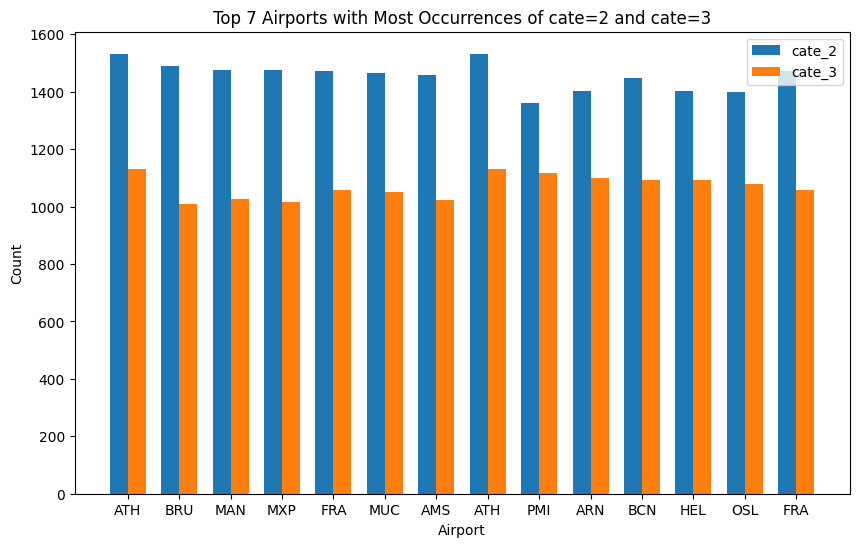

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming   DataFrame is named grouped_data
# Replace 'cate_2' and 'cate_3' with the actual column names in   DataFrame
top_airports_cate_2 = grouped_data.nlargest(7, 'cate_2')
top_airports_cate_3 = grouped_data.nlargest(7, 'cate_3')

# Concatenate the top airports for cate_2 and cate_3
top_airports = pd.concat([top_airports_cate_2, top_airports_cate_3])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions = range(len(top_airports))

ax.bar(bar_positions, top_airports['cate_2'], width=bar_width, label='cate_2')
ax.bar([p + bar_width for p in bar_positions], top_airports['cate_3'], width=bar_width, label='cate_3')

# Adding labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Top 7 Airports with Most Occurrences of cate=2 and cate=3')
ax.set_xticks([p + bar_width/2 for p in bar_positions])
ax.set_xticklabels(top_airports['airport'])
ax.legend()

# Show the plot
plt.show()


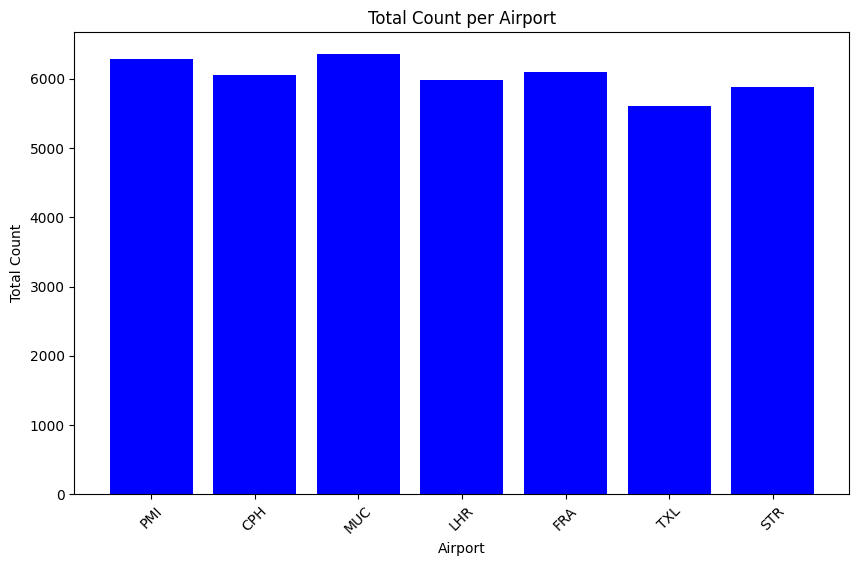

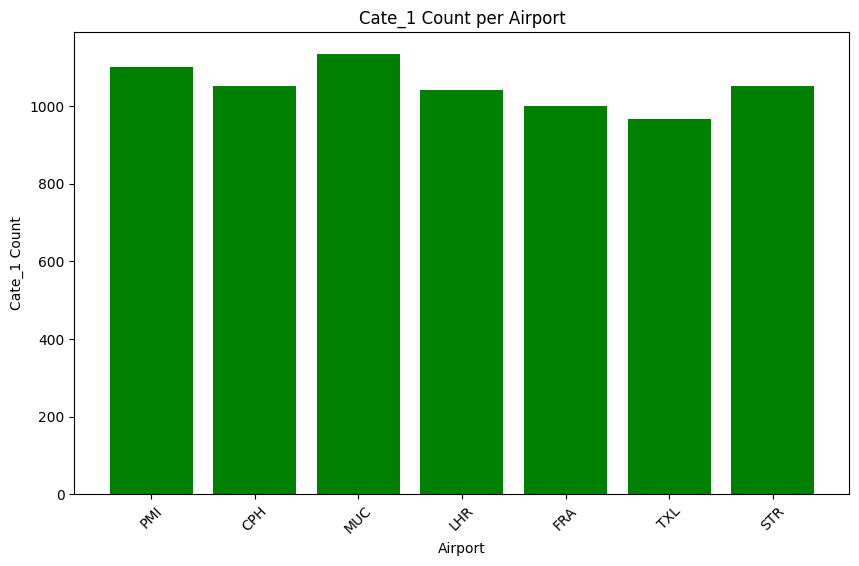

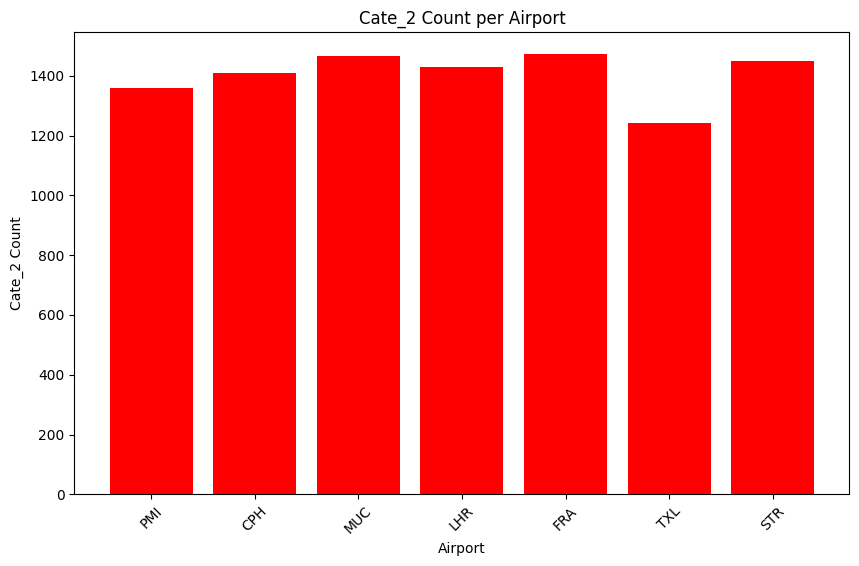

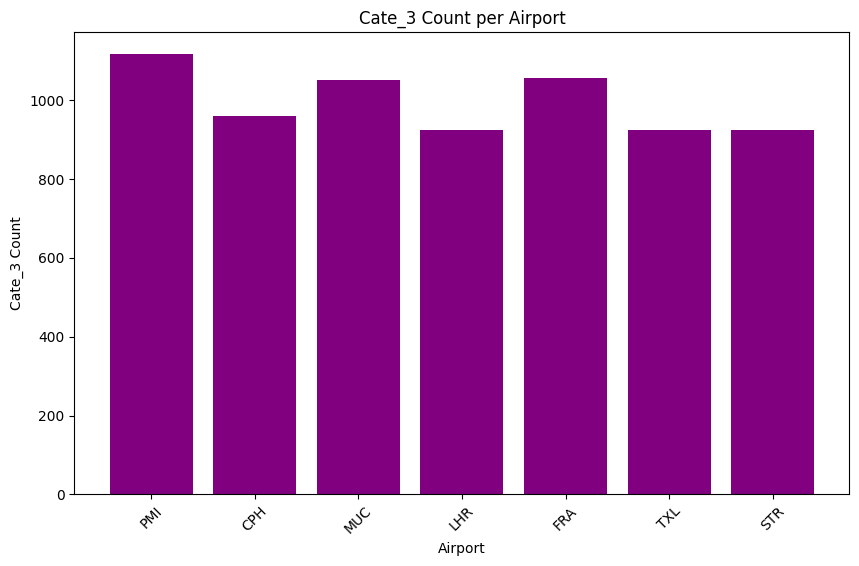

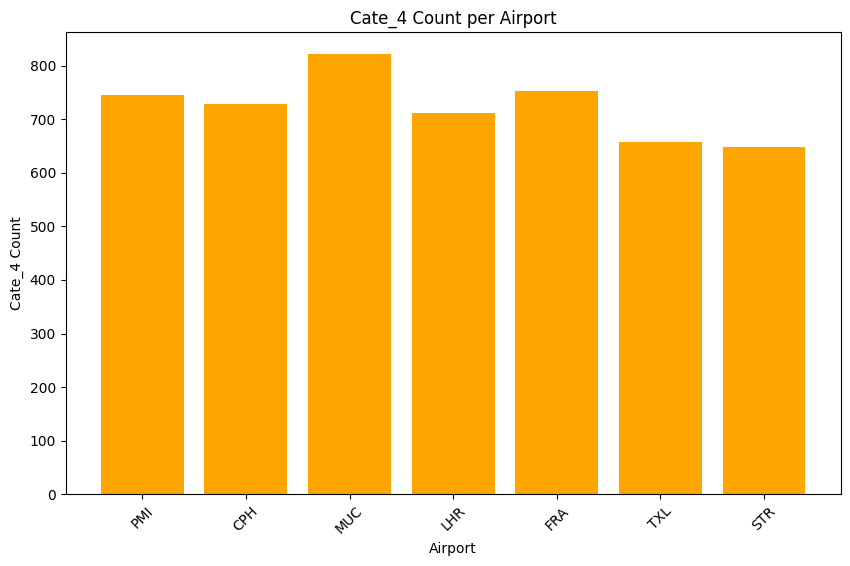

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming   DataFrame is named grouped_data
# Sort by total sum and extract the top 7 airports
top7_total = grouped_data.sort_values(by=['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4'], ascending=False).head(7)

# Plot 1: Total count per airport
plt.figure(figsize=(10, 6))
plt.bar(top7_total['airport'], top7_total[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']].sum(axis=1), color='blue')
plt.title('Total Count per Airport')
plt.xlabel('Airport')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Cate_1 count per airport
plt.figure(figsize=(10, 6))
plt.bar(top7_total['airport'], top7_total['cate_1'], color='green')
plt.title('Cate_1 Count per Airport')
plt.xlabel('Airport')
plt.ylabel('Cate_1 Count')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Cate_2 count per airport
plt.figure(figsize=(10, 6))
plt.bar(top7_total['airport'], top7_total['cate_2'], color='red')
plt.title('Cate_2 Count per Airport')
plt.xlabel('Airport')
plt.ylabel('Cate_2 Count')
plt.xticks(rotation=45)
plt.show()

# Plot 4: Cate_3 count per airport
plt.figure(figsize=(10, 6))
plt.bar(top7_total['airport'], top7_total['cate_3'], color='purple')
plt.title('Cate_3 Count per Airport')
plt.xlabel('Airport')
plt.ylabel('Cate_3 Count')
plt.xticks(rotation=45)
plt.show()

# Plot 5: Cate_4 count per airport
plt.figure(figsize=(10, 6))
plt.bar(top7_total['airport'], top7_total['cate_4'], color='orange')
plt.title('Cate_4 Count per Airport')
plt.xlabel('Airport')
plt.ylabel('Cate_4 Count')
plt.xticks(rotation=45)
plt.show()


### 根据平均值得出盈利情况

In [76]:
import pandas as pd

# Assuming   data is stored in df
df = pd.read_excel("output.xlsx")
# If not, replace df with   actual DataFrame

# Calculate the new column
df['Sum Consum'] = df['cate_0'] * 5 + df['cate_1'] * 30 + df['cate_2'] * 100 + df['cate_3'] * 225 + df['cate_4'] * 400

# Save the DataFrame with the new column
df.to_excel('output_with_sum_consum.xlsx', index=False)


In [83]:
import pandas as pd

# Assuming   data is stored in df
df = pd.read_excel("output_with_sum_consum.xlsx")
# If not, replace df with   actual DataFrame

# Calculate the new column
df['Sum customers'] = df['cate_0'] + df['cate_1'] + df['cate_2']  + df['cate_3']  + df['cate_4'] 

# Save the DataFrame with the new column
df.to_excel('output_with_sum_consum_customers.xlsx', index=False)

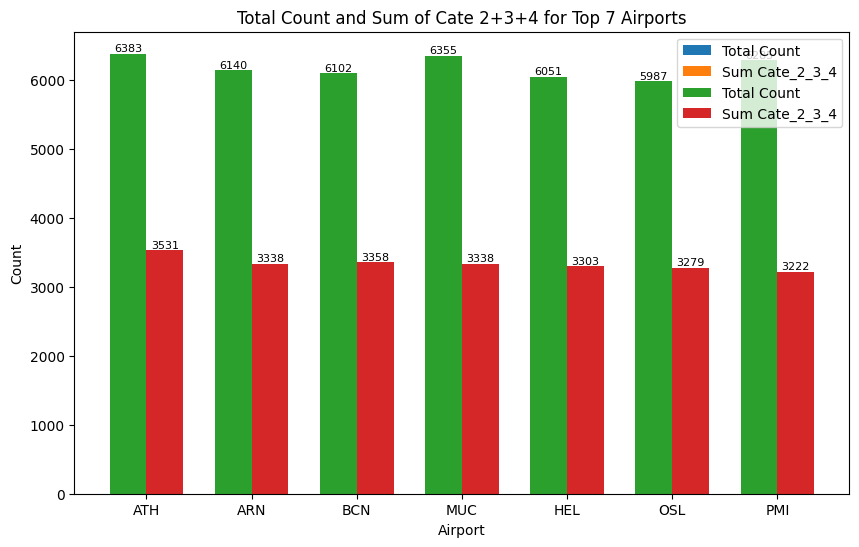

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming   data is stored in df
# If not, replace df with   actual DataFrame

# Find the top 7 airports based on Sum Consum
top7_airports = df.nlargest(7, 'Sum_Consum')

# Calculate the total count and the sum of cate_2, cate_3, and cate_4
top7_airports['Total Count'] = top7_airports[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']].sum(axis=1)
top7_airports['Sum Cate_2_3_4'] = top7_airports[['cate_2', 'cate_3', 'cate_4']].sum(axis=1)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(top7_airports))

# Total Count
ax.bar(bar_positions, top7_airports['Total Count'], width=bar_width, label='Total Count')

# Sum of cate_2, cate_3, and cate_4
ax.bar([p + bar_width for p in bar_positions], top7_airports['Sum Cate_2_3_4'], width=bar_width, label='Sum Cate_2_3_4')

# Total Count
total_count_bars = ax.bar(bar_positions, top7_airports['Total Count'], width=bar_width, label='Total Count')

# Sum of cate_2, cate_3, and cate_4
sum_cate_2_3_4_bars = ax.bar([p + bar_width for p in bar_positions], top7_airports['Sum Cate_2_3_4'], width=bar_width, label='Sum Cate_2_3_4')

# Set labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Total Count and Sum of Cate 2+3+4 for Top 7 Airports')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(top7_airports['airport'])
ax.legend()
for bar in total_count_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black', fontsize=8)

for bar in sum_cate_2_3_4_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black', fontsize=8)

# Show the plot
plt.show()


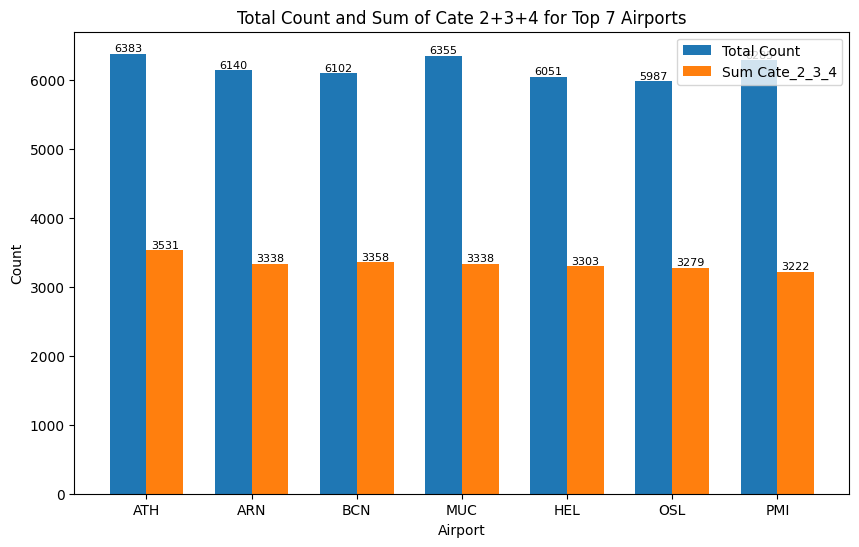

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming   data is stored in df
# If not, replace df with   actual DataFrame

# Find the top 7 airports based on Sum Consum
top7_airports = df.nlargest(7, 'Sum Consum')

# Calculate the total count and the sum of cate_2, cate_3, and cate_4
top7_airports['Total Count'] = top7_airports[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']].sum(axis=1)
top7_airports['Sum Cate_2_3_4'] = top7_airports[['cate_2', 'cate_3', 'cate_4']].sum(axis=1)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(top7_airports))

# Total Count
total_count_bars = ax.bar(bar_positions, top7_airports['Total Count'], width=bar_width, label='Total Count')

# Sum of cate_2, cate_3, and cate_4
sum_cate_2_3_4_bars = ax.bar([p + bar_width for p in bar_positions], top7_airports['Sum Cate_2_3_4'], width=bar_width, label='Sum Cate_2_3_4')

# Set labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Total Count and Sum of Cate 2+3+4 for Top 7 Airports')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(top7_airports['airport'])
ax.legend()

# Add text labels on top of the bars
for bar in total_count_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black', fontsize=8)

for bar in sum_cate_2_3_4_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black', fontsize=8)

# Show the plot
plt.show()


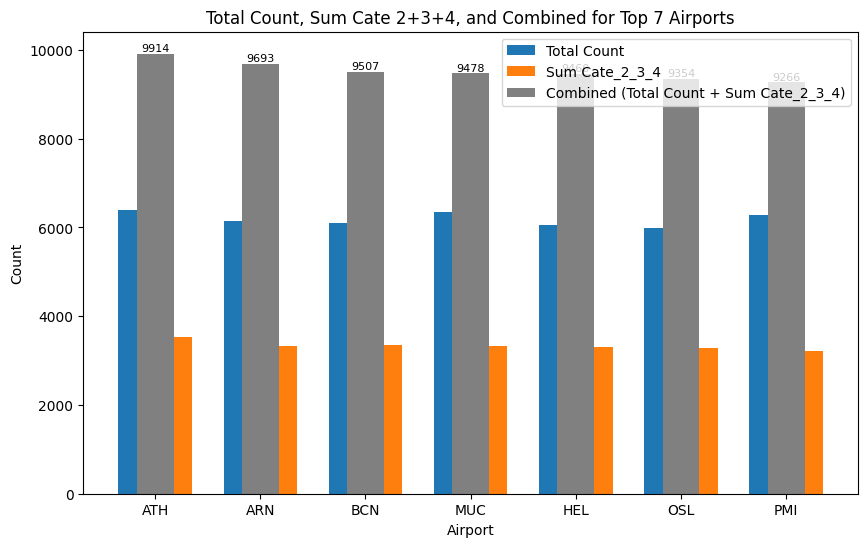

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming   data is stored in df
# If not, replace df with   actual DataFrame

# Find the top 7 airports based on Sum Consum
top7_airports = df.nlargest(7, 'Sum Consum')

# Calculate the total count and the sum of cate_2, cate_3, and cate_4
top7_airports['Total Count'] = top7_airports[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']].sum(axis=1)
top7_airports['Sum Cate_2_3_4'] = top7_airports[['cate_2', 'cate_3', 'cate_4']].sum(axis=1)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(top7_airports))

# Total Count
total_count_bars = ax.bar(bar_positions, top7_airports['Total Count'], width=bar_width, label='Total Count')

# Sum of cate_2, cate_3, and cate_4
sum_cate_2_3_4_bars = ax.bar([p + bar_width for p in bar_positions], top7_airports['Sum Cate_2_3_4'], width=bar_width, label='Sum Cate_2_3_4')

# Calculate and sort the sum of total_count_bars and sum_cate_2_3_4_bars
combined_bars = [bar1 + bar2 for bar1, bar2 in zip(top7_airports['Total Count'], top7_airports['Sum Cate_2_3_4'])]
sorted_combined_bars = sorted(enumerate(combined_bars), key=lambda x: x[1], reverse=True)

# Plot the combined result
combined_positions = [pos + bar_width / 2 for pos in bar_positions]
combined_bars_sorted = [combined_bars[i] for i, _ in sorted_combined_bars]
ax.bar(combined_positions, combined_bars_sorted, width=bar_width, label='Combined (Total Count + Sum Cate_2_3_4)', color='grey')

# Set labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Total Count, Sum Cate 2+3+4, and Combined for Top 7 Airports')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(top7_airports['airport'])
ax.legend()

# Add text labels on top of the combined bars
for pos, val in zip(combined_positions, combined_bars_sorted):
    plt.text(pos, val, round(val), ha='center', va='bottom', color='black', fontsize=8)

# Show the plot
plt.show()


In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='business_trip', hue='amount_spent_cat', data=passengersEU)
plt.title('Spending Categories by Business Trip in EU')
plt.xlabel('Business Trip')
plt.ylabel('Count')
plt.legend(title='Spending Category')
plt.show()

NameError: name 'passengersEU' is not defined

<Figure size 1000x600 with 0 Axes>

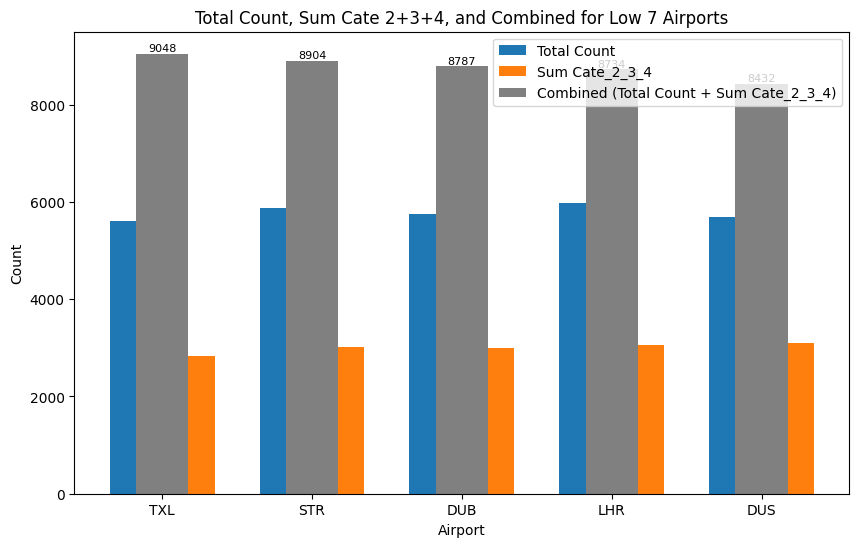

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming   data is stored in df
# If not, replace df with   actual DataFrame
df = pd.read_excel("output_with_sum_consum_customers.xlsx")
# Find the top 7 airports based on Sum Consum
top7_airports = df.nsmallest(5, 'Sum_Consum')

# Calculate the total count and the sum of cate_2, cate_3, and cate_4
top7_airports['Total Count'] = top7_airports[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4']].sum(axis=1)
top7_airports['Sum Cate_2_3_4'] = top7_airports[['cate_2', 'cate_3', 'cate_4']].sum(axis=1)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(top7_airports))

# Total Count
total_count_bars = ax.bar(bar_positions, top7_airports['Total Count'], width=bar_width, label='Total Count')

# Sum of cate_2, cate_3, and cate_4
sum_cate_2_3_4_bars = ax.bar([p + bar_width for p in bar_positions], top7_airports['Sum Cate_2_3_4'], width=bar_width, label='Sum Cate_2_3_4')

# Calculate and sort the sum of total_count_bars and sum_cate_2_3_4_bars
combined_bars = [bar1 + bar2 for bar1, bar2 in zip(top7_airports['Total Count'], top7_airports['Sum Cate_2_3_4'])]
sorted_combined_bars = sorted(enumerate(combined_bars), key=lambda x: x[1], reverse=True)

# Plot the combined result
combined_positions = [pos + bar_width / 2 for pos in bar_positions]
combined_bars_sorted = [combined_bars[i] for i, _ in sorted_combined_bars]
ax.bar(combined_positions, combined_bars_sorted, width=bar_width, label='Combined (Total Count + Sum Cate_2_3_4)', color='grey')

# Set labels and title
ax.set_xlabel('Airport')
ax.set_ylabel('Count')
ax.set_title('Total Count, Sum Cate 2+3+4, and Combined for Low 7 Airports')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(top7_airports['airport'])
ax.legend()

# Add text labels on top of the combined bars
for pos, val in zip(combined_positions, combined_bars_sorted):
    plt.text(pos, val, round(val), ha='center', va='bottom', color='black', fontsize=8)

# Show the plot
plt.show()
